In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path=r"C:\Users\md mumtaz\Downloads\bank.csv"

In [6]:
bank_df=pd.read_csv(path,sep=';')
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


**divide into categorical and numerical data**

In [8]:
cat_column=[key for key,value in(bank_df.dtypes).items() if value=='object']
num_column=[key for key,value in(bank_df.dtypes).items() if value!='object']
num_column

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

**make histogram plot**

[ 67. 415. 990. 818. 750. 554. 432. 368.  53.  26.  21.  20.   7.]
[19.         24.23076923 29.46153846 34.69230769 39.92307692 45.15384615
 50.38461538 55.61538462 60.84615385 66.07692308 71.30769231 76.53846154
 81.76923077 87.        ]


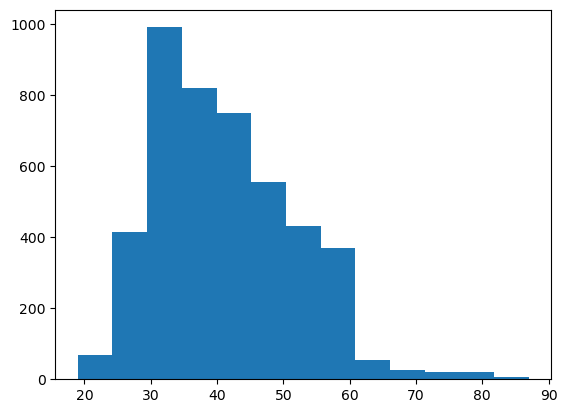

In [31]:
data1=bank_df['age']
count,bins,x=plt.hist(data,bins=13)
print(count)
print(bins)

**range of numerical columns**

In [32]:
range_list=[]
for i in range(len(bins)):
    if i!=len(bins)-1:
        x=bins[i]
        y=bins[i+1]
        z=(f"{round(x,2)} -{round(y,2)}")
        range_list.append(z)
range_list

['19.0 -24.23',
 '24.23 -29.46',
 '29.46 -34.69',
 '34.69 -39.92',
 '39.92 -45.15',
 '45.15 -50.38',
 '50.38 -55.62',
 '55.62 -60.85',
 '60.85 -66.08',
 '66.08 -71.31',
 '71.31 -76.54',
 '76.54 -81.77',
 '81.77 -87.0']

**create data frame from range and count**

In [33]:
age_df=pd.DataFrame(zip(range_list,count),columns=['range','count'])
age_df

,range,count
0,19.0 -24.23,67.0
1,24.23 -29.46,415.0
2,29.46 -34.69,990.0
3,34.69 -39.92,818.0
4,39.92 -45.15,750.0
5,45.15 -50.38,554.0
6,50.38 -55.62,432.0
7,55.62 -60.85,368.0
8,60.85 -66.08,53.0
9,66.08 -71.31,26.0


**create data file folders**

In [34]:
import os
try:
    main_dir=os.getcwd()
    new_folder='bank-histogram-graph'
    data_files=os.path.join(main_dir,new_folder)
    os.makedirs(data_files)
except Exception as e:
    print(e)

**create histogram_graph_folder**

In [36]:
import os
try:
    main_dir=os.getcwd()
    new_folder='bank-histogram-graph'
    histogram_files=os.path.join(main_dir,new_folder)
    os.makedirs(histogram_files)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\md mumtaz\\Documents\\naresh it Assignment\\bank-histogram-graph'


**Dataframe plotting histogram**

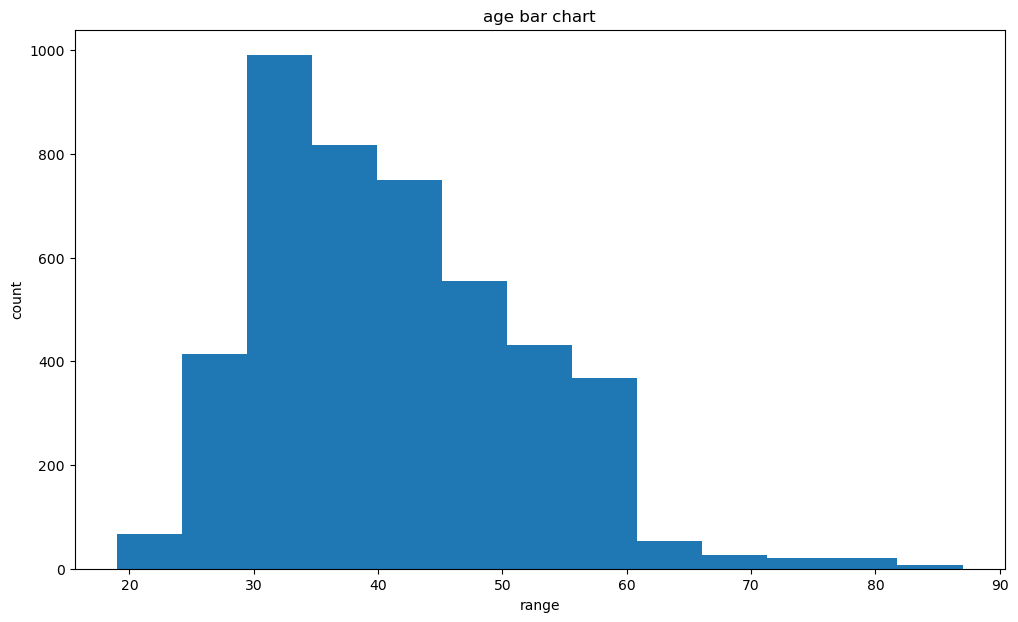

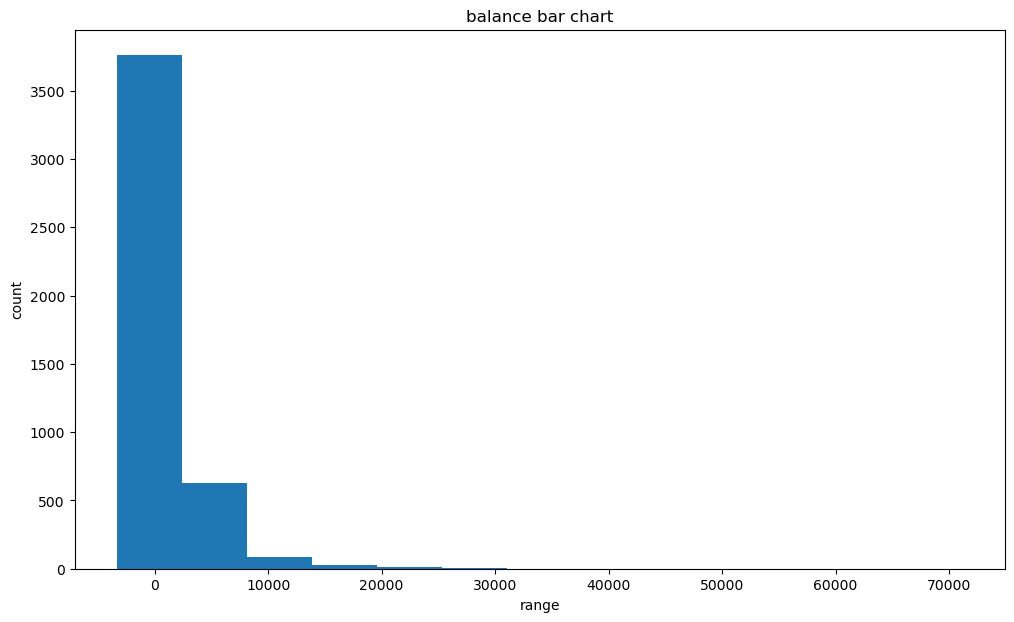

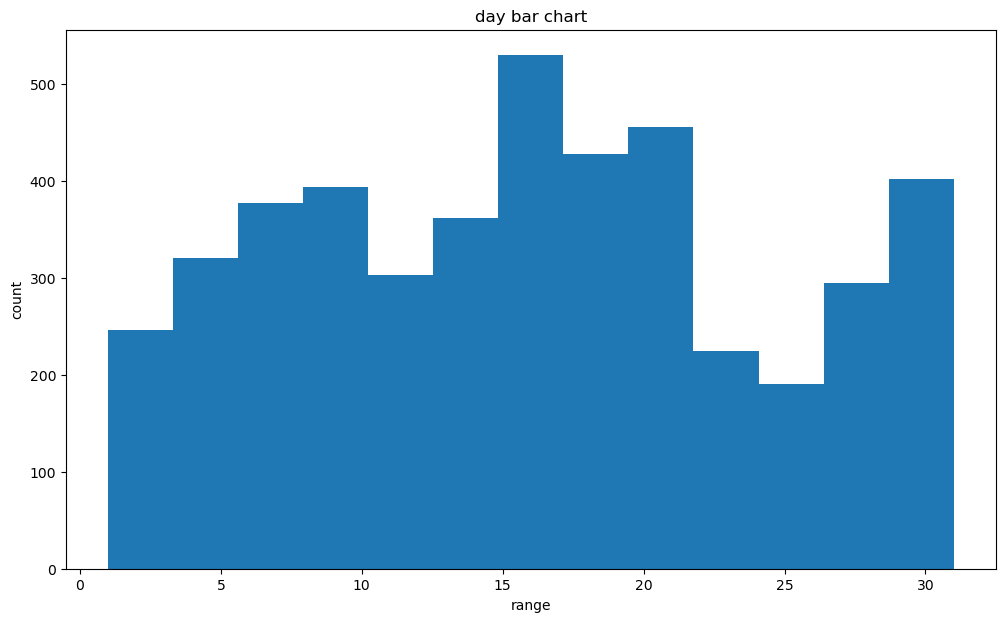

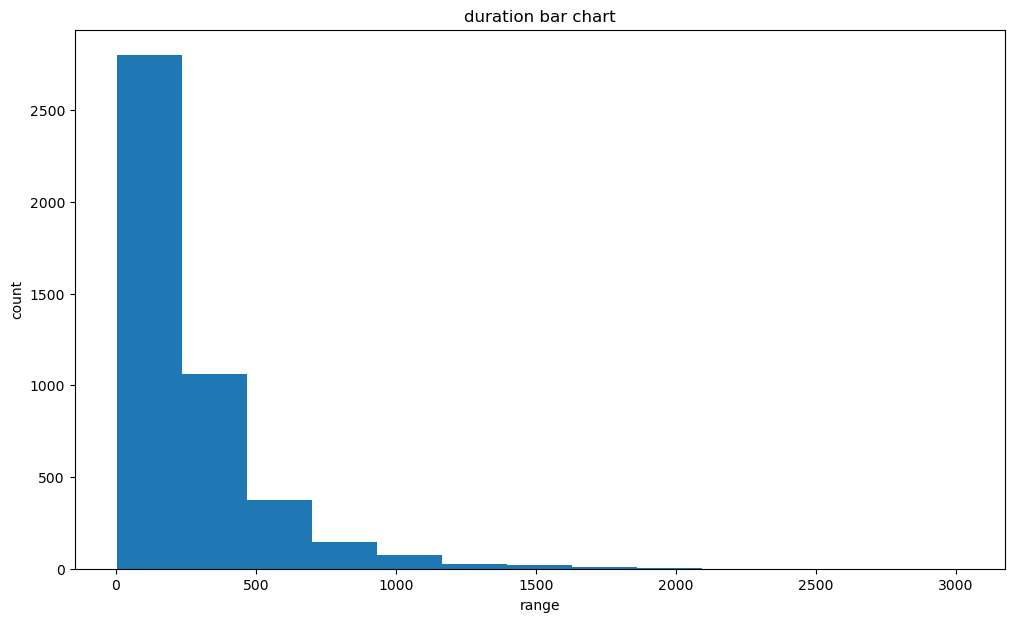

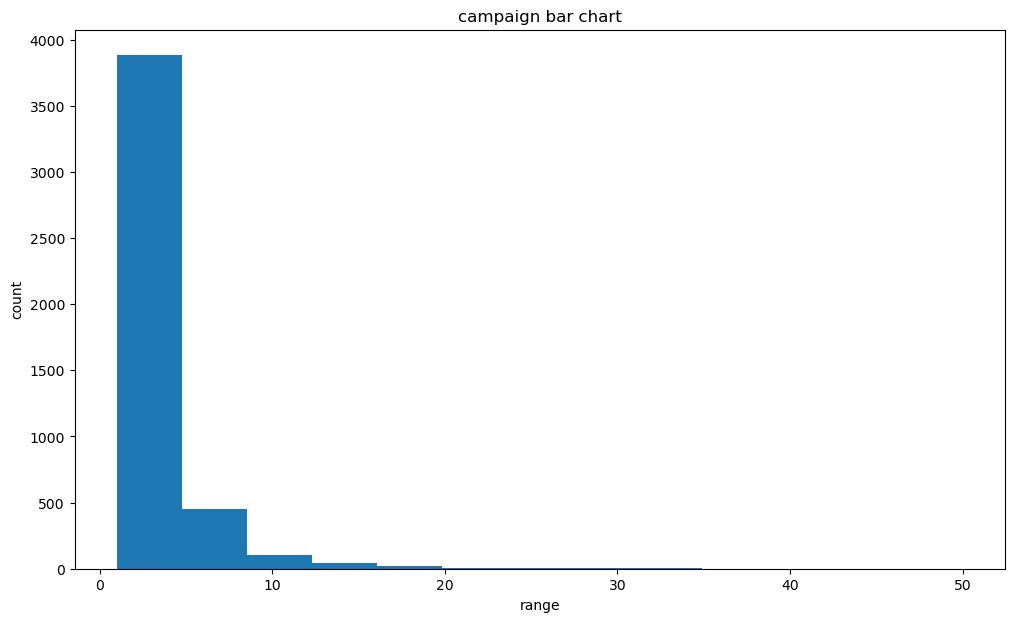

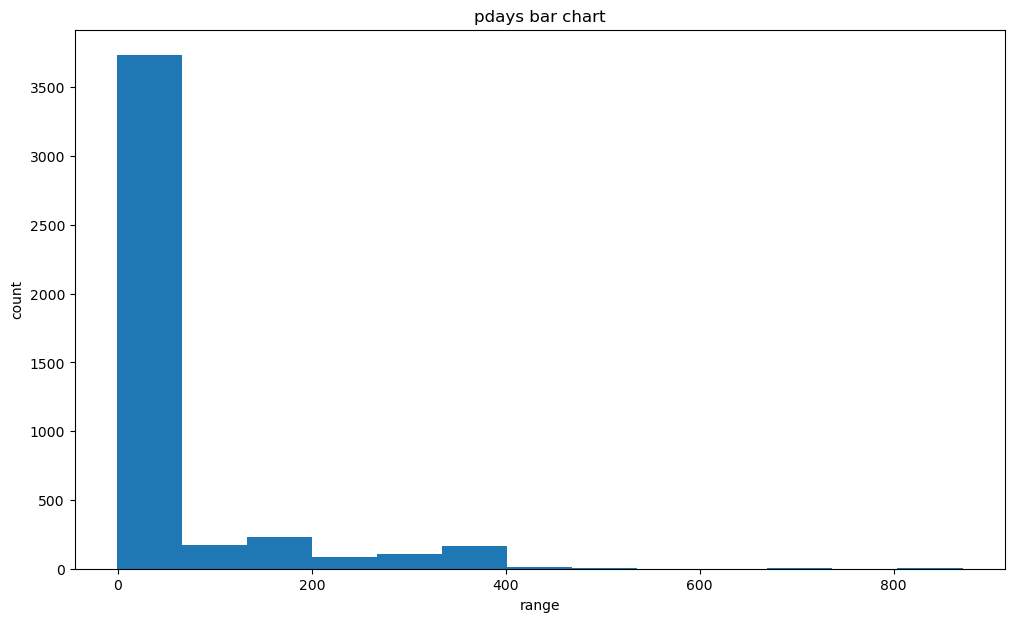

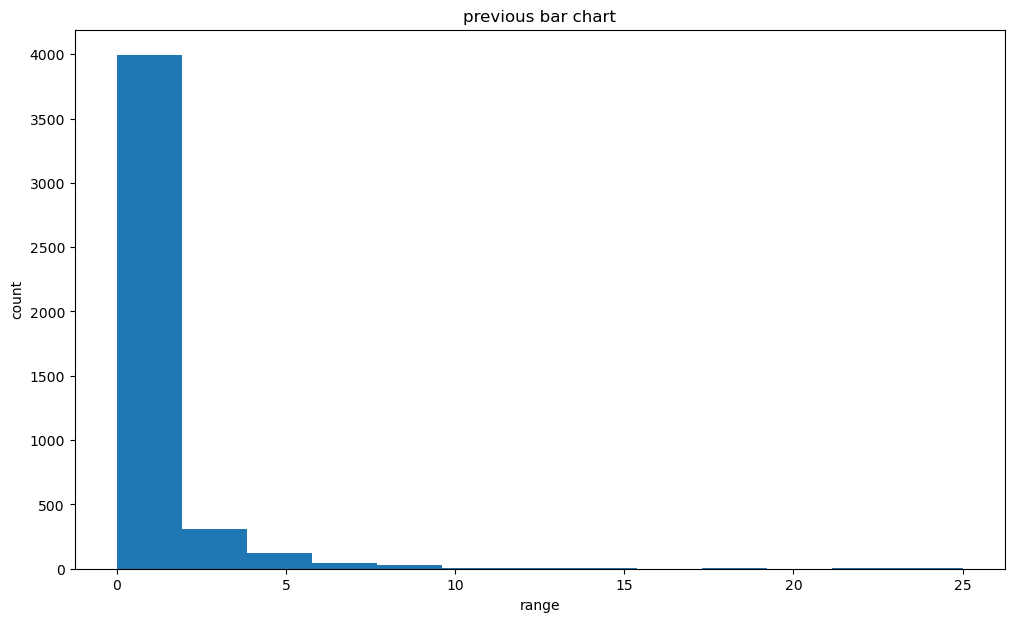

In [45]:
range_list=[]
for k, i in enumerate(num_column, 1):
    data2=bank_df[i]
    plt.figure(figsize=(12,7))
    count,bins,x=plt.hist(data2,bins=13)
    plt.xlabel('range')
    plt.ylabel('count')
    plt.title(f'{i} bar chart')
    plt.savefig(f"{histogram_files}\{i}_hist.jpg")
    range_list.clear()
    for j in range(len(bins)):
        if j!=len(bins)-1:
            x=bins[j]
            y=bins[j+1]
            z=(f"{round(x,2)}-{round(y,2)}")
            range_list.append(z)
    col=['range','count']
    df2=pd.DataFrame(zip(range_list,count),columns=col)
    df2.to_csv(f"{data_files}\{i}.csv",index=False)